# SKZCAM Protocol for generating quantum clusters for embedded cluster calculations

This notebook contains the scripts for a user to generate their own series of clusters according to the SKZCAM protocol, which is detailed in the paper: https://arxiv.org/abs/2202.04633. This protocol is highly simple and intuitive and requires the execution of only one function to generate a complete set of clusters in a systematic manner. We detail the Python function below and also provide two examples for generating clusters found in the aforementioned paper. If you have any suggestions on how to improve the scripts, please email me at: bxs21@cam.ac.uk.

The core function (with default parameters listed) for generating clusters is given by:

`generate_SKZCAM_clusters(filename='',output_file_append='',M_element='Mg',O_element='O',centre_atom='O',centre_atom_index=0,fmt='pun',test_cluster_size=1000,two_dimensional=True,pbc=False,supercell=[7,7,7],MO_dist=0.5,num_rdf_clusters=10,prec=3):`

The code works as a two step process:
1. The input file is first processed and a test cluster is generated that is centred about a chosen atom.
2. The test cluster is used to cleave out a systematic series of clusters via the SKZCAM approach.

Only one input file is required:
1. The input file containing the structure of the system that you want to study. This can be either given as a cluster (.xyz or .pun) file or as a repeating unit cell with the choice of any of the formats that ASE can read: https://wiki.fysik.dtu.dk/ase/ase/io/io.html

The resulting output files are:
1. **cluster_test.xyz** - The structure file for the test cluster
2. **cluster_rdf_indices.npy** - The indices for the series of clusters cleaved from the test cluster, useful for inputting into programs such as ChemShell or ORCA.
3. **cluster_rdf_plot.png** - The radial distribution function plot showing the peaks corresponding to each cluster. The x-axis gives the size of quantum cluster (in terms of number of metal cations) at each RDF peak whilst the y-axis gives the number of metal cations corresponding to each peak.
4. **Structures/cluster_rdf_{1..}.xyz** - The structure files for the rdf clusters numbered according to which RDF peak they correspond to.

Parameters:
* filename: string
    > The file name of the input file containing the system that you want to generate clusters from.

* output_file_append: string
    > Appends all the output files with a string to identify different systems.

* M_element: string
    > The element of the metal cation.

* O_element: string
    > The element of anion, which is normally 'O' for metal-oxides.

* centre_atom: string
    > The element of central atom about which you want to form the radial distribution function (RDF) around. For the O vacancy, this would be 'O'.

* centre_atom_index: string
    > centre_atom automatically picks a surface atom or an atom in the centre of the bulk for the surface and bulk systems respectively. If that is fine, then this option does not need to be modified. However, if there are specific centre_atoms (e.g. subsurface atoms) that you would like to use, this parameter may be used to specify the index of the specific atom.

* fmt: string
    > The format of the input file. Can accept any format provided by ASE as well as .pun files from ChemShell.

* test_cluster_size: integer
    > The size of the intermediate test cluster that should be created from which clusters created from the SKZCAM approach are cleaved out from.

* two_dimensional: boolean
    > If the system is two-dimensional. This option should be set to 'True' for surface systems.

* pbc: boolean
    > Whether the input system is a repeating unit cell or a cluster.

* supercell: list
    > Controls the size of supercell (created from the repeating unit cell) about which the test cluster must be cleaved out from.

* MO_dist: float
    > The bond length between the metal and oxygen. This is normally set automatically by the script if set below 1.0. If done manually, this should be the largest bond length for systems where the bond lengths may differ.

* num_rdf_clusters: integer
    > The number of clusters to generate with the SKZCAM approach. This number also controls how many RDF peaks are provided in the RDF plot.

* prec: integer
    > Sets the precision for associating ions to a RDF shell. The default value of 3 is a good choice.

In [1]:
from rdf_scripts import *
# The source code can be found in rdf_script.py of the same folder

## Examples

YOU HAVE BEEN SKZCAMMED


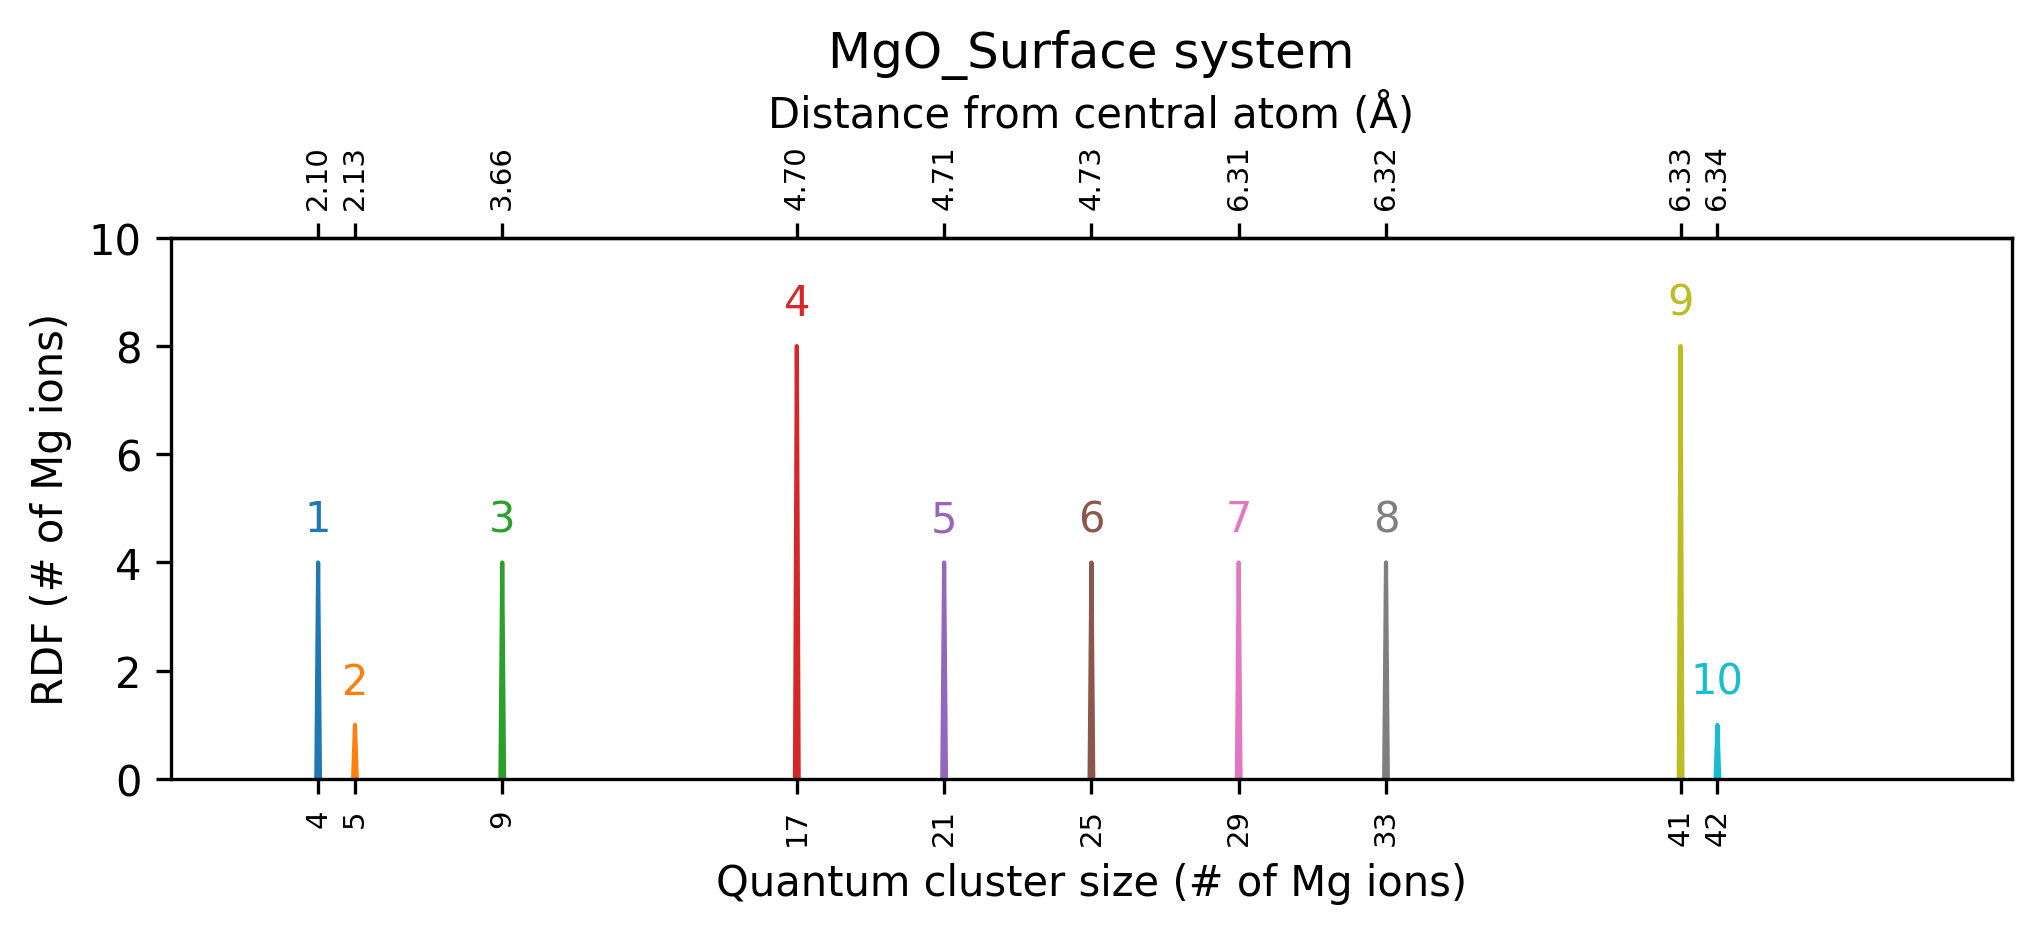

In [2]:
# Example for creating the clusters in the MgO surface system
generate_SKZCAM_clusters('mgo.poscar',output_file_append='MgO_Surface',M_element='Mg',O_element='O',centre_atom='O',fmt='vasp',two_dimensional=True, \
    pbc=True,supercell=[5,5,1])

YOU HAVE BEEN SKZCAMMED


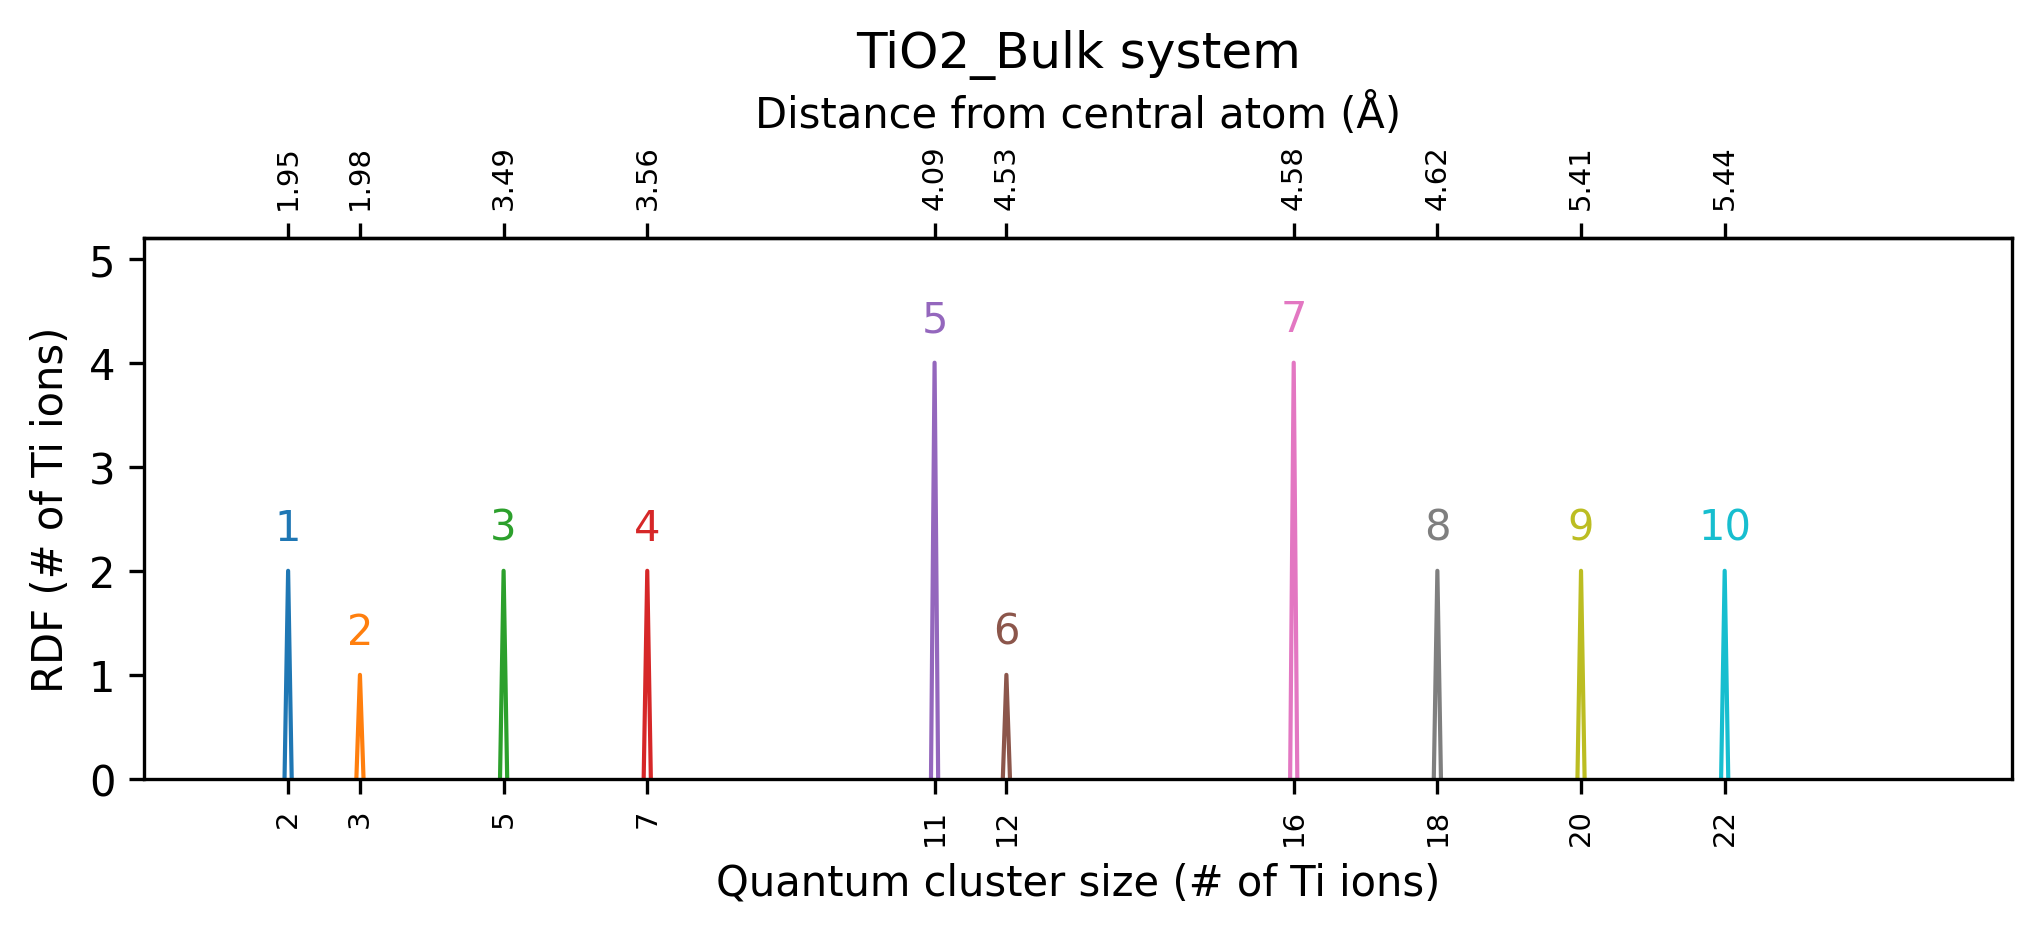

In [3]:
# Example for creating the clusters in the TiO2 bulk system
generate_SKZCAM_clusters('tio2_shells_cluster.pun',output_file_append='TiO2_Bulk',M_element='Ti',O_element='O',centre_atom='O',fmt='pun',two_dimensional=False, \
    pbc=True,supercell=[5,5,5])

## Now try your own system on Binder!!!

Simply upload your file into the Binder document:

![](binder_explanation.png)


In [ ]:
generate_SKZCAM_clusters('your_input_file',output_file_append='your_own_system',M_element='M',O_element='O',centre_atom='O',fmt='pun',two_dimensional=False, \
    pbc=True,supercell=[5,5,5])

## (Optional) - Visualize clusters created by SKZCAM approach

In [2]:
# You can pick which files to view by just modifying the filename in the line below
dummy1 = io.read('Structures/MgO_Surface_cluster_rdf_5.xyz')
view(dummy1, viewer='x3d')